# Assignment 8 - Pandas

Due Wednesday July 29

Your assignment should be handed in as an iPython/Jupyter notebook checked into your private GitHub repository CMSC6950_Assignments in a new folder named assignment_8. 

In this assignment we will use pandas to examine earthquake data.

Start by importing pandas, numpy and matplotlib.

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

A dataset has be retrieved .csv format from the [USGS Earthquakes Database](https://earthquake.usgs.gov/earthquakes/search/). It is located at:

http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv

You don't even need to download it. You can open it directly with Pandas.

### 1) Use Pandas' read_csv function directly on this url to open it as a DataFrame
(Don't use any special options). Display the first few rows and the DataFrame info.

In [3]:
df = pd.read_csv("http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv")
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
0,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,ak11155107,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,ml,4.0,171.43,0.34200,0.0247,nn,nn00436847,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,ak11151142,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake
3,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,ak11151135,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake
4,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ml,6.0,285.00,0.04321,0.2000,ci,ci37171541,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120108 entries, 0 to 120107
Data columns (total 15 columns):
time         120108 non-null object
latitude     120108 non-null float64
longitude    120108 non-null float64
depth        120107 non-null float64
mag          120065 non-null float64
magType      120065 non-null object
nst          59688 non-null float64
gap          94935 non-null float64
dmin         85682 non-null float64
rms          119716 non-null float64
net          120108 non-null object
id           120108 non-null object
updated      120108 non-null object
place        120108 non-null object
type         120108 non-null object
dtypes: float64(8), object(7)
memory usage: 13.7+ MB


You should have seen that the dates were not automatically parsed into datetime types.

### 2) Re-read the data in such a way that all date columns are identified as dates and the earthquake id is used as the index

Verify that this worked using the `head` and `info` functions.


In [11]:
def parse_date(dates):
    print(type(date))

In [157]:
# headers = ["id", "time", "latitude", "longitude", "depth", "mag", "magType", "nst", "gap", "dmin", "rms", "net", "updated", "place", "type"]
parsedates = ["time", "updated"]
rer = pd.read_csv("http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv", parse_dates=parsedates, index_col='id')
#rer = pd.read_csv('df', parse_dates=[0], index_col=0)
rer.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type
id,,,,,,,,,,,,,,
ak11155107,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,2014-02-05 19:34:41.515000+00:00,"26km S of Redoubt Volcano, Alaska",earthquake
nn00436847,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,ml,4.0,171.43,0.34200,0.0247,nn,2014-02-01 01:35:09+00:00,"32km S of Alamo, Nevada",earthquake
ak11151142,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,2014-02-01 00:03:53.010000+00:00,"12km NNW of North Nenana, Alaska",earthquake
ak11151135,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,2014-01-31 23:41:25.007000+00:00,"22km S of Cantwell, Alaska",earthquake
ci37171541,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ml,6.0,285.00,0.04321,0.2000,ci,2014-02-01 00:13:20.107000+00:00,"10km WNW of Progreso, Mexico",earthquake


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120108 entries, 0 to 120107
Data columns (total 15 columns):
time         120108 non-null object
latitude     120108 non-null float64
longitude    120108 non-null float64
depth        120107 non-null float64
mag          120065 non-null float64
magType      120065 non-null object
nst          59688 non-null float64
gap          94935 non-null float64
dmin         85682 non-null float64
rms          119716 non-null float64
net          120108 non-null object
id           120108 non-null object
updated      120108 non-null object
place        120108 non-null object
type         120108 non-null object
dtypes: float64(8), object(7)
memory usage: 13.7+ MB


### 3) Use `describe` to get the basic statistics of all the columns

Note the highest and lowest magnitude of earthquakes in the databse.

In [159]:
df.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms
count,120108.000000,120108.000000,120107.000000,120065.000000,59688.000000,94935.000000,85682.000000,119716.000000
mean,38.399579,-99.961402,28.375029,1.793958,17.878284,124.048978,0.893198,0.358174
std,21.938258,82.996858,62.215416,1.343466,14.911369,68.518595,2.903966,0.364046
min,-73.462000,-179.998900,-9.900000,-0.970000,0.000000,9.000000,0.000000,0.000000
25%,34.228917,-147.742025,4.100000,0.820000,8.000000,74.000000,0.020760,0.070000
50%,38.805300,-120.832000,9.200000,1.400000,14.000000,107.000000,0.073670,0.200000
75%,53.889500,-116.068100,22.880000,2.400000,22.000000,155.000000,0.447000,0.590000
max,86.651400,179.998000,697.360000,8.200000,365.000000,356.400000,64.498000,8.460000


### 4) Use `sort_values` to get the top 20 earthquakes by magnitude

In [160]:
st_v = rer[rer.type == "earthquake"]
st_v = st_v.sort_values('mag',ascending = False)
st_v.head(20)


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type
id,,,,,,,,,,,,,,
usc000nzvd,2014-04-01 23:46:47.260,-19.6097,-70.7691,25.00,8.2,mww,NaN,23.0,0.609,0.66,us,2015-07-30 16:24:51.223000+00:00,"94km NW of Iquique, Chile",earthquake
usc000rki5,2014-06-23 20:53:09.700,51.8486,178.7352,109.00,7.9,mww,NaN,22.0,0.133,0.71,us,2015-04-18 21:54:08.699000+00:00,"19km SE of Little Sitkin Island, Alaska",earthquake
usc000p27i,2014-04-03 02:43:13.110,-20.5709,-70.4931,22.40,7.7,mww,NaN,44.0,1.029,0.82,us,2015-06-06 07:31:05.755000+00:00,"53km SW of Iquique, Chile",earthquake
usc000phx5,2014-04-12 20:14:39.300,-11.2701,162.1481,22.56,7.6,mww,NaN,13.0,2.828,0.71,us,2015-04-18 21:54:27.398000+00:00,"93km SSE of Kirakira, Solomon Islands",earthquake
usb000pr89,2014-04-19 13:28:00.810,-6.7547,155.0241,43.37,7.5,mww,NaN,16.0,3.820,1.25,us,2015-04-18 21:54:18.633000+00:00,"70km SW of Panguna, Papua New Guinea",earthquake
usc000piqj,2014-04-13 12:36:19.230,-11.4633,162.0511,39.00,7.4,mww,NaN,17.0,2.885,1.00,us,2015-08-13 19:29:13.018000+00:00,"112km S of Kirakira, Solomon Islands",earthquake
usb000slwn,2014-10-14 03:51:34.460,12.5262,-88.1225,40.00,7.3,mww,NaN,18.0,1.078,0.70,us,2015-08-13 19:35:02.679000+00:00,"74km S of Intipuca, El Salvador",earthquake
usb000pq41,2014-04-18 14:27:24.920,17.3970,-100.9723,24.00,7.2,mww,NaN,46.0,2.250,1.20,us,2015-08-13 19:30:39.599000+00:00,"33km ESE of Petatlan, Mexico",earthquake
usc000stdc,2014-11-01 18:57:22.380,-19.6903,-177.7587,434.00,7.1,mww,NaN,13.0,4.415,0.84,us,2015-01-20 09:03:09.040000+00:00,"144km NE of Ndoi Island, Fiji",earthquake


Examine the structure of the `place` column. The country information seems to be in there. How would you get it out?

### 5) Extract the country using Pandas [text data functions](https://pandas.pydata.org/pandas-docs/stable/text.html)

Add it as a new column to the dataframe. (Is it really just country? No, some rows have the name of a US state.)

In [161]:
rer['country']= rer['place'].str.split(",").str.get(1)
rer

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type,country
id,,,,,,,,,,,,,,,
ak11155107,2014-01-31 23:53:37.000,60.252000,-152.708100,90.200,1.10,ml,NaN,NaN,NaN,0.2900,ak,2014-02-05 19:34:41.515000+00:00,"26km S of Redoubt Volcano, Alaska",earthquake,Alaska
nn00436847,2014-01-31 23:48:35.452,37.070300,-115.130900,0.000,1.33,ml,4.0,171.430000,0.342000,0.0247,nn,2014-02-01 01:35:09+00:00,"32km S of Alamo, Nevada",earthquake,Nevada
ak11151142,2014-01-31 23:47:24.000,64.671700,-149.252800,7.100,1.30,ml,NaN,NaN,NaN,1.0000,ak,2014-02-01 00:03:53.010000+00:00,"12km NNW of North Nenana, Alaska",earthquake,Alaska
ak11151135,2014-01-31 23:30:54.000,63.188700,-148.957500,96.500,0.80,ml,NaN,NaN,NaN,1.0700,ak,2014-01-31 23:41:25.007000+00:00,"22km S of Cantwell, Alaska",earthquake,Alaska
ci37171541,2014-01-31 23:30:52.210,32.616833,-115.692500,10.590,1.34,ml,6.0,285.000000,0.043210,0.2000,ci,2014-02-01 00:13:20.107000+00:00,"10km WNW of Progreso, Mexico",earthquake,Mexico
ci11419722,2014-01-31 23:30:36.930,32.567667,-117.013500,0.010,1.51,ml,16.0,264.000000,0.080810,0.2100,ci,2014-02-01 00:09:04.470000+00:00,"3km N of Tijuana, Mexico",quarry blast,Mexico
ci11419714,2014-01-31 23:28:04.020,33.359000,-116.360500,12.980,1.17,ml,26.0,163.000000,0.032660,0.1200,ci,2014-02-01 00:54:07.630000+00:00,"11km N of Borrego Springs, California",earthquake,California
ak11151127,2014-01-31 23:22:52.000,62.800200,-150.696500,86.400,1.50,ml,NaN,NaN,NaN,0.4700,ak,2014-01-31 23:33:23.190000+00:00,"61km NNW of Talkeetna, Alaska",earthquake,Alaska
ak11151125,2014-01-31 23:20:42.000,58.169500,-151.992400,50.100,2.10,ml,NaN,NaN,NaN,0.3700,ak,2014-01-31 23:25:57.118000+00:00,"48km NNE of Kodiak, Alaska",earthquake,Alaska


### 6) Find the 10 states / countries with the highest _number_ of earthquakes

In [162]:
df_high = rer[rer.type == 'earthquake']
df_high = df_high[['country','type']].groupby('country').count()
df_high.sort_values('type',ascending = False).head(10)

,type
country,
California,43774
Alaska,33589
Oregon,3014
Nevada,2842
Hawaii,2564
Washington,2486
Puerto Rico,2284
Indonesia,2120
Oklahoma,1992


### 7) Find the top 10 states / countries where the strongest and weakest earthquakes occured

In [163]:
#st_wk = rer.sort_values('mag',ascending = False).groupby('depth').head(20)
#st_wk.head(10)
df_earth = rer[rer.type == 'earthquake']
df_mag = df_earth[df_earth['mag'].notnull()]
df_mag_t = df_mag[['country','mag']]
df_mag_t.sort_values('mag',ascending = False).head(10)


,country,mag
id,,
usc000nzvd,Chile,8.2
usc000rki5,Alaska,7.9
usc000p27i,Chile,7.7
usc000phx5,Solomon Islands,7.6
usb000pr89,Papua New Guinea,7.5
usc000piqj,Solomon Islands,7.4
usb000slwn,El Salvador,7.3
usb000pq41,Mexico,7.2
usc000stdc,Fiji,7.1


In [164]:
df_mag_b = df_mag.loc[df_mag.groupby('country')['mag'].idxmin()]
df_mag_b = df_mag_b.sort_values('mag',ascending = True)
df_mag_b = df_mag_b[['country','mag']]
# df_mag_b = df_mag_b[['country','mag']].groupby('country').first()
df_mag_b.head(10)

,country,mag
id,,
uw60944536,Oregon,-0.97
uw60066413,Washington,-0.90
uu60006040,Montana,-0.85
nn00466165,Nevada,-0.60
ci37248368,California,-0.45
uu60095047,Wyoming,-0.14
uu60004415,Utah,-0.10
mb15917540,Sierra Leone,0.00
ak11171967,Alaska,0.00


It looks like US states are being treated differently from foreign countries. We would like to fix that.

How can we tell if a name is a US state name? Python has a package for that: https://pypi.python.org/pypi/us!

This is a good time to try installing a new package using `pip`. Pip is the original python package manager that predates `conda`. Basically `conda` is more oriented towards data science while `pip` is more general purpose. There are lots more packages on `pip` than on `conda`. You can read a [comparision](https://www.quora.com/What-is-the-comparison-among-conda-vs-pip-vs-anaconda) of these two utilities if you want to know more.

### 8) Install the `us` package using pip, either directly from the notebook or the command line

The shell command is `pip install us`.

In [165]:
pip install us

Note: you may need to restart the kernel to use updated packages.


### 9) Import the `us` package to verify your installation works

In [166]:
import us

### 10) Read the [`us` documentation](https://pypi.python.org/pypi/us) to figure out how to create a list of state names (all upper case)

In [168]:
# converting and overwriting values in column 
# rer["country"]= rer["country"].str.upper() 
# rer
# us_states = []
# for state in us.states.STATES:
#     us_state.append(str(state))
us_states = [str(state).upper() for state in us.states.STATES]
us_states

['ALABAMA',
 'ALASKA',
 'ARIZONA',
 'ARKANSAS',
 'CALIFORNIA',
 'COLORADO',
 'CONNECTICUT',
 'DELAWARE',
 'FLORIDA',
 'GEORGIA',
 'HAWAII',
 'IDAHO',
 'ILLINOIS',
 'INDIANA',
 'IOWA',
 'KANSAS',
 'KENTUCKY',
 'LOUISIANA',
 'MAINE',
 'MARYLAND',
 'MASSACHUSETTS',
 'MICHIGAN',
 'MINNESOTA',
 'MISSISSIPPI',
 'MISSOURI',
 'MONTANA',
 'NEBRASKA',
 'NEVADA',
 'NEW HAMPSHIRE',
 'NEW JERSEY',
 'NEW MEXICO',
 'NEW YORK',
 'NORTH CAROLINA',
 'NORTH DAKOTA',
 'OHIO',
 'OKLAHOMA',
 'OREGON',
 'PENNSYLVANIA',
 'RHODE ISLAND',
 'SOUTH CAROLINA',
 'SOUTH DAKOTA',
 'TENNESSEE',
 'TEXAS',
 'UTAH',
 'VERMONT',
 'VIRGINIA',
 'WASHINGTON',
 'WEST VIRGINIA',
 'WISCONSIN',
 'WYOMING']

### 11) Write a function to check whether a string is a US state name.
This function should not be case sensitive. It should also strip any whitespace out of the test string.

In [169]:
def is_us_state(state_name):
    if type(state_name) != type(""):
        state_name = str(state_name)
    state_name = state_name.upper().strip()
    return state_name in us_states

### 12) Use Pandas' [apply](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html) function to apply this to each row of the country name series

You should produce a new boolean series. (Hint: use `dropna()` to drop rows that have null values before calling apply.)

In [170]:
countries = rer['country'].dropna()
countries = countries.apply(is_us_state)
countries
# is_us_state(countries.values[0])

id
ak11155107     True
nn00436847     True
ak11151142     True
ak11151135     True
ci37171541    False
ci11419722    False
ci11419714     True
ak11151127     True
ak11151125     True
nc72153361     True
usc000mqlp    False
ak11155101     True
nc72153351     True
nc72153356     True
usc000mqln    False
nm020414a      True
ci11419698     True
ci11419706     True
ak11151102     True
nc72153341     True
mb14328395     True
ci11419690     True
nc72153331     True
pr14031002    False
ak11151084     True
usc000mf1x     True
ci11419682     True
ci11419674     True
ak11151076     True
uw60681512     True
              ...  
usc000t6y2    False
usb000t1ww     True
nc72358491     True
ci37065311     True
nc72358486     True
hv60809571     True
uw60926197     True
nc72358481     True
mb14712763     True
nm60020625     True
mb14923536     True
ak11453419     True
ak11453418     True
usc000t6y1    False
nc72358471     True
nc72358476     True
nc72358466     True
nc72358461     True
ci37065303     Tr

### 13) reindex this boolean series to match the dataframe's index
Fill the null values with `False` using `.fillna()`.

In [171]:
countries.reindex(rer.index).fillna(False)

id
ak11155107     True
nn00436847     True
ak11151142     True
ak11151135     True
ci37171541    False
ci11419722    False
ci11419714     True
ak11151127     True
ak11151125     True
nc72153361     True
usc000mqlp    False
ak11155101     True
nc72153351     True
nc72153356     True
usc000mqln    False
nm020414a      True
usc000mqls    False
ci11419698     True
ci11419706     True
ak11151102     True
nc72153341     True
mb14328395     True
ci11419690     True
nc72153331     True
pr14031002    False
ak11151084     True
usc000mf1x     True
ci11419682     True
ci11419674     True
ak11151076     True
              ...  
usb000t1ww     True
nc72358491     True
ci37065311     True
nc72358486     True
hv60809571     True
uw60926197     True
nc72358481     True
mb14712763     True
nm60020625     True
mb14923536     True
ak11453419     True
ak11453418     True
usc000t6y1    False
nc72358471     True
nc72358476     True
nc72358466     True
nc72358461     True
ci37065303     True
ak11453417     Tr

### 14) Now re-assign the country column in the DataFrame to `USA` if the row is a state.
Also add the state name as a new column.

In [172]:
new_rer = rer
new_rer["state"] = new_rer["country"]
new_rer['is_us']= countries
new_rer['is_us'] = new_rer['is_us'].fillna(False)
new_rer.loc[new_rer.is_us, "country"] = "USA"
new_rer

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type,country,state,is_us
id,,,,,,,,,,,,,,,,,
ak11155107,2014-01-31 23:53:37.000,60.252000,-152.708100,90.200,1.10,ml,NaN,NaN,NaN,0.2900,ak,2014-02-05 19:34:41.515000+00:00,"26km S of Redoubt Volcano, Alaska",earthquake,USA,Alaska,True
nn00436847,2014-01-31 23:48:35.452,37.070300,-115.130900,0.000,1.33,ml,4.0,171.430000,0.342000,0.0247,nn,2014-02-01 01:35:09+00:00,"32km S of Alamo, Nevada",earthquake,USA,Nevada,True
ak11151142,2014-01-31 23:47:24.000,64.671700,-149.252800,7.100,1.30,ml,NaN,NaN,NaN,1.0000,ak,2014-02-01 00:03:53.010000+00:00,"12km NNW of North Nenana, Alaska",earthquake,USA,Alaska,True
ak11151135,2014-01-31 23:30:54.000,63.188700,-148.957500,96.500,0.80,ml,NaN,NaN,NaN,1.0700,ak,2014-01-31 23:41:25.007000+00:00,"22km S of Cantwell, Alaska",earthquake,USA,Alaska,True
ci37171541,2014-01-31 23:30:52.210,32.616833,-115.692500,10.590,1.34,ml,6.0,285.000000,0.043210,0.2000,ci,2014-02-01 00:13:20.107000+00:00,"10km WNW of Progreso, Mexico",earthquake,Mexico,Mexico,False
ci11419722,2014-01-31 23:30:36.930,32.567667,-117.013500,0.010,1.51,ml,16.0,264.000000,0.080810,0.2100,ci,2014-02-01 00:09:04.470000+00:00,"3km N of Tijuana, Mexico",quarry blast,Mexico,Mexico,False
ci11419714,2014-01-31 23:28:04.020,33.359000,-116.360500,12.980,1.17,ml,26.0,163.000000,0.032660,0.1200,ci,2014-02-01 00:54:07.630000+00:00,"11km N of Borrego Springs, California",earthquake,USA,California,True
ak11151127,2014-01-31 23:22:52.000,62.800200,-150.696500,86.400,1.50,ml,NaN,NaN,NaN,0.4700,ak,2014-01-31 23:33:23.190000+00:00,"61km NNW of Talkeetna, Alaska",earthquake,USA,Alaska,True
ak11151125,2014-01-31 23:20:42.000,58.169500,-151.992400,50.100,2.10,ml,NaN,NaN,NaN,0.3700,ak,2014-01-31 23:25:57.118000+00:00,"48km NNE of Kodiak, Alaska",earthquake,USA,Alaska,True


### 15) Now redo the country count and minimum magnitdue using the corrected data

In [173]:
## COUNT
new_df_high = new_rer[new_rer.type == 'earthquake']
new_df_high = new_df_high[['country','type']].groupby('country').count()
new_df_high.sort_values('type',ascending = False).head(10)

,type
country,
USA,95497
Puerto Rico,2284
Indonesia,2120
Papua New Guinea,1356
Chile,1191
Japan,1150
New Zealand,762
Philippines,749
Mexico,667


In [174]:
## MIN. MAGNITUDE
new_df_earth = new_rer[new_rer.type == 'earthquake']
new_df_mag = new_df_earth[df_earth['mag'].notnull()]
new_df_mag_b = new_df_mag.loc[new_df_mag.groupby('country')['mag'].idxmin()]
new_df_mag_b = new_df_mag_b.sort_values('mag',ascending = True)
new_df_mag_b = new_df_mag_b[['country','mag']]
# df_mag_b = df_mag_b[['country','mag']].groupby('country').first()
new_df_mag_b.head(10)

,country,mag
id,,
uw60944536,USA,-0.97
mb15917540,Sierra Leone,0.00
ak11298449,Aleutian Islands,0.20
uw60793341,Canada,0.20
pr14338000,Puerto Rico,0.30
ci15530521,Mexico,0.96
ak11194119,,1.20
pr14249046,U.S. Virgin Islands,1.50
pr14241003,British Virgin Islands,1.70


### 16) Create a filtered dataset that only has earthquakes of magnitude 4 or larger

In [175]:
mag_greater_4 = new_rer[new_rer.mag >= 4]
mag_greater_4

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type,country,state,is_us
id,,,,,,,,,,,,,,,,,
usc000mqlp,2014-01-31 23:08:03.660,-4.9758,153.9466,110.18,4.2,mb,NaN,98.0,1.940,0.61,us,2014-04-08 01:43:19+00:00,"115km ESE of Taron, Papua New Guinea",earthquake,Papua New Guinea,Papua New Guinea,False
usc000mqln,2014-01-31 22:54:32.970,-28.1775,-177.9058,95.84,4.3,mb,NaN,104.0,1.063,1.14,us,2014-04-08 01:43:19+00:00,"120km N of Raoul Island, New Zealand",earthquake,New Zealand,New Zealand,False
usc000mqls,2014-01-31 22:49:49.740,-23.1192,179.1174,528.34,4.4,mb,NaN,80.0,5.439,0.95,us,2014-04-08 01:43:19+00:00,South of the Fiji Islands,earthquake,NaN,NaN,False
usc000mf1x,2014-01-31 22:19:44.330,51.1569,-178.0910,37.50,4.2,mb,NaN,NaN,NaN,0.83,us,2014-04-08 01:43:19+00:00,"72km E of Amatignak Island, Alaska",earthquake,USA,Alaska,True
usc000mqlm,2014-01-31 21:56:44.320,-4.8800,153.8434,112.66,4.3,mb,NaN,199.0,1.808,0.79,us,2014-04-08 01:43:19+00:00,"100km ESE of Taron, Papua New Guinea",earthquake,Papua New Guinea,Papua New Guinea,False
ak11151037,2014-01-31 21:20:54.000,58.0887,-151.6567,45.60,4.0,ml,NaN,NaN,NaN,0.62,ak,2015-01-30 23:08:40.571000+00:00,"53km NE of Kodiak, Alaska",earthquake,USA,Alaska,True
usc000mez1,2014-01-31 21:20:29.390,-4.9036,153.7511,104.58,4.7,mb,NaN,42.0,1.733,0.81,us,2014-04-08 01:43:19+00:00,"93km ESE of Taron, Papua New Guinea",earthquake,Papua New Guinea,Papua New Guinea,False
usc000meyz,2014-01-31 21:13:58.930,-16.2100,178.2133,30.99,4.5,mb,NaN,127.0,1.533,1.43,us,2014-04-08 01:43:19+00:00,"127km W of Lambasa, Fiji",earthquake,Fiji,Fiji,False
usc000mqlr,2014-01-31 20:03:27.610,-65.1289,178.8636,9.95,4.8,mb,NaN,141.0,13.295,0.70,us,2014-04-08 01:43:19+00:00,"257km N of Scott Island Bank, Antarctica",earthquake,Antarctica,Antarctica,False


### 17) Analyze the distribution of the Earthquake magnitudes in the filtered distribution

Make a histogram of the Earthquake count versus magnitude. Make sure to use a Logarithmic scale. What sort of relationship do you see?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12c3932b0>]],
      dtype=object)

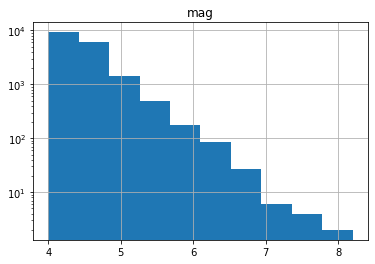

In [184]:
# mag_counts = mag_greater_4.
# mag_counts = mag_greater_4[['mag']].groupby('mag').count()
mag_greater_4.hist('mag', log=True)

#### count decreases as mag increases

### 18) Visualize the locations of earthquakes by making a scatterplot of their latitude and longitude.

Use the filtered data. Color it by magnitude. Make it pretty

In [190]:
import plotly.graph_objs as go
import plotly.figure_factory as ff

In [195]:
fig = go.Figure(data=go.Scattergeo(
        lon = mag_greater_4['longitude'],
        lat = mag_greater_4['latitude'],
        text = mag_greater_4['mag'],
        mode = 'markers',
        marker_color = mag_greater_4['mag'],
#         showland = True
        ))
fig.update_layout(
    title='Earthquakes Around the World with magnitude more than 4',
    geo = dict(
        showland = True
    ),
)
fig.show()

### 19) Do the same for depth

In [197]:
fig = go.Figure(data=go.Scattergeo(
        lon = mag_greater_4['longitude'],
        lat = mag_greater_4['latitude'],
        text = mag_greater_4['depth'],
        mode = 'markers',
        marker_color = mag_greater_4['depth'],
#         showland = True
        ))
fig.update_layout(
    title='Earthquakes Around the World with magnitude more than 4 showing Depth',
    geo = dict(
        showland = True
    ),
)
fig.show()